# The aim of this notebooks is to provide exploratory data analysis

In [ ]:
# Basic Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

# Library for downloading data
from tvDatafeed import TvDatafeed, Interval

In [3]:
# Basic Environment setup
plt.rcParams['figure.figsize'] = (15,5)

# Make pandas display all columns
pd.set_option("display.max_columns", None)

## Downloading Data

In [4]:
tv = TvDatafeed()

bitcoi = tv.get_hist(symbol='BTCUSD', exchange='COINBASE', interval=Interval.in_daily, n_bars=5000)
bitcoi = bitcoi.reset_index()
bitcoi.index = bitcoi['datetime']
bitcoi = bitcoi.drop(columns = 'datetime', inplace = False)

you are using nologin method, data you access may be limited


## Exploratory Data Analysis

In [5]:
bitcoi.head()

,symbol,open,high,low,close,volume
datetime,,,,,,
2014-11-30 19:00:00,COINBASE:BTCUSD,300.0,370.0,300.00,370.0,0.05660
2014-12-01 19:00:00,COINBASE:BTCUSD,377.0,378.0,377.00,378.0,15.01367
2014-12-02 19:00:00,COINBASE:BTCUSD,377.9,378.0,377.01,378.0,0.54666
2014-12-03 19:00:00,COINBASE:BTCUSD,377.1,377.1,377.10,377.1,0.01001
2014-12-05 19:00:00,COINBASE:BTCUSD,378.0,378.0,378.00,378.0,0.01501


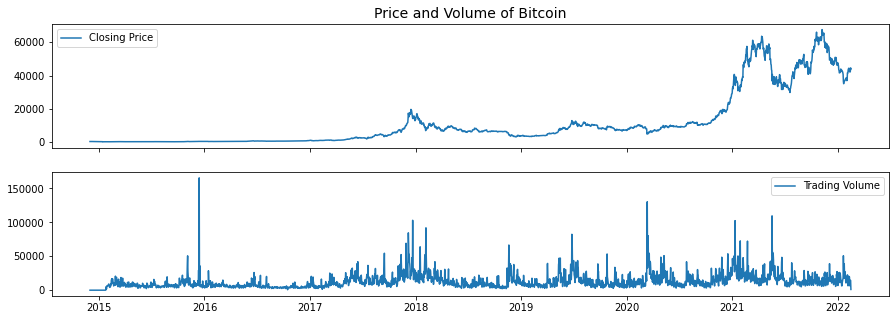

In [6]:

fig, (ax1, ax2) = plt.subplots(2,1, sharex = True)

ax1.plot(bitcoi['close'], label = "Closing Price")
ax2.plot(bitcoi['volume'], label = "Trading Volume")

ax1.set_title("Price and Volume of Bitcoin", fontsize = 14)
ax1.legend()
ax2.legend()


In [7]:
bitcoi.head()

,symbol,open,high,low,close,volume
datetime,,,,,,
2014-11-30 19:00:00,COINBASE:BTCUSD,300.0,370.0,300.00,370.0,0.05660
2014-12-01 19:00:00,COINBASE:BTCUSD,377.0,378.0,377.00,378.0,15.01367
2014-12-02 19:00:00,COINBASE:BTCUSD,377.9,378.0,377.01,378.0,0.54666
2014-12-03 19:00:00,COINBASE:BTCUSD,377.1,377.1,377.10,377.1,0.01001
2014-12-05 19:00:00,COINBASE:BTCUSD,378.0,378.0,378.00,378.0,0.01501


In [8]:
# calculate return
'''
Function to calculate Returns

Parameter:
dataframe
column - str column name to calculate return on 
window - int or list of int representing days (default set to 1)

Output:

'''

def calculate_return(df, column, window = 1):
    
    if df.index.name != 'datetime':
        df.index = df['datetime']
        #df = df.drop(columns = 'datetime', inplace = False)
    
    # calculate return and create a column
    if type(window) == list:
        for i in window:
            df[str(i)+'_days_return'] = df[column].pct_change(i)
    else:
        df[str(i)+'_days_return'] = df[column].pct_change(window)
        
    
    
    return df

In [9]:
bitcoi = calculate_return(bitcoi, 'close', [1,2,3,4,5,7])


In [10]:
 bitcoi['1_days_return'].name[0]

'1'

Text(0.5, 1.0, 'Bitcoin 1- day Return')

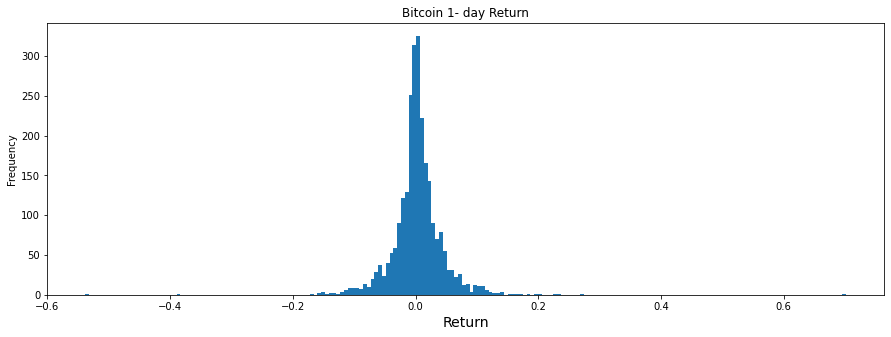

In [11]:

fig, ax = plt.subplots()
column = '1_days_return'
day = column[0]

ax = bitcoi[column].plot.hist( bins = 200)

ax.set_xlabel("Return", fontsize = 14)
ax.set_title(f"Bitcoin {day}- day Return")

Text(0.5, 1.0, 'Bitcoin 4- day Return')

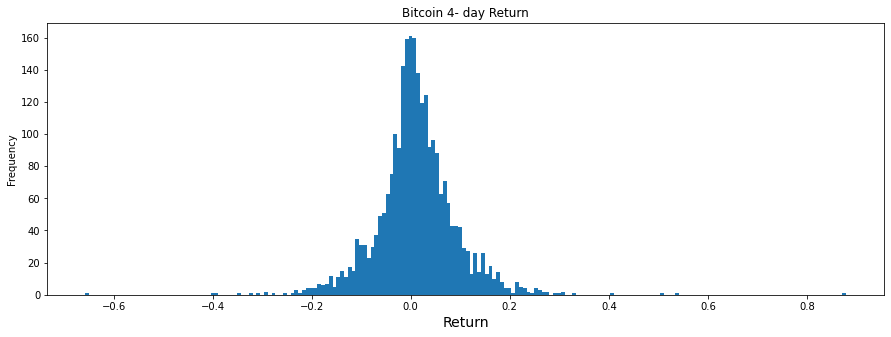

In [12]:
fig, ax = plt.subplots()
column = '4_days_return'
day = column[0]

ax = bitcoi[column].plot.hist( bins = 200)

ax.set_xlabel("Return", fontsize = 14)
ax.set_title(f"Bitcoin {day}- day Return")

Text(0.5, 1.0, 'Bitcoin 7- day Return')

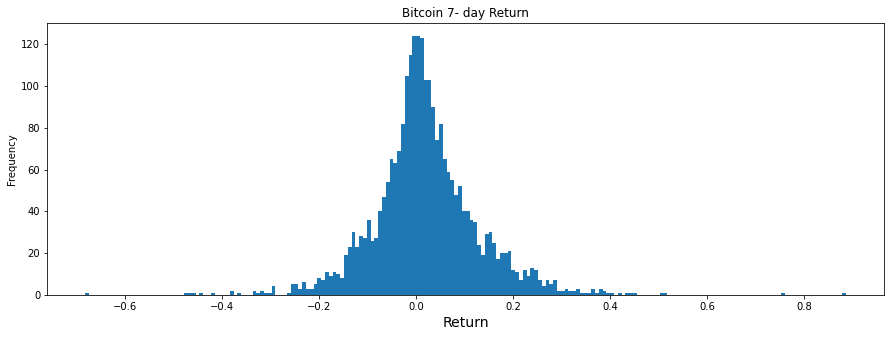

In [13]:
fig, ax = plt.subplots()
column = '7_days_return'
day = column[0]

ax = bitcoi[column].plot.hist( bins = 200)

ax.set_xlabel("Return", fontsize = 14)
ax.set_title(f"Bitcoin {day}- day Return")

**Linear Regression**